In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
btc_raw_df = pd.read_parquet("/home/giujorge/Documents/Projets/bot_strategies/data/raw/BTC-USDT.csv.parquet.gzip")
btc_raw_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.77518300,1502942459999,7564.90685084,3,0.07518300,320.39085084,7960.54017996
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.00000000,1502942519999,0.00000000,0,0.00000000,0.00000000,7960.45262989
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.26107400,1502942579999,1117.54292144,2,0.26107400,1117.54292144,7960.37529526
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.01200800,1502942639999,51.17185184,3,0.01200800,51.17185184,7960.37529526
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.14079600,1502942699999,599.99933808,1,0.14079600,599.99933808,7960.37529526
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18 14:09:00,39423.05,39423.06,39377.05,39385.62,22.37338000,1650290999999,881512.83100580,758,6.59638000,259885.09290650,0
2022-04-18 14:10:00,39385.61,39401.54,39370.24,39400.00,29.43069000,1650291059999,1159033.25545720,788,14.55146000,573044.31840130,0
2022-04-18 14:11:00,39400.00,39444.80,39399.83,39442.55,25.65637000,1650291119999,1011437.53518520,720,13.72377000,541044.94403500,0


In [4]:
btc_raw_df['MA20'] = btc_raw_df['close'].rolling(20).mean()
btc_raw_df['MA50'] = btc_raw_df['close'].rolling(50).mean()

In [6]:
btc_raw_df.dropna(inplace=True)

In [7]:
df = btc_raw_df[['close', 'MA20', 'MA50']]

In [8]:
Buy = []
Sell = []

for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50.iloc[i] \
    and df.MA20.iloc[i-1] < df.MA50.iloc[i-1] :
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50.iloc[i] \
    and df.MA20.iloc[i-1] > df.MA50.iloc[i-1] :
        Sell.append(i)

In [9]:
Buy

[0,
 78,
 190,
 250,
 281,
 345,
 501,
 714,
 822,
 874,
 958,
 1075,
 1177,
 1262,
 1338,
 1387,
 1438,
 1524,
 1577,
 1608,
 1660,
 1704,
 1765,
 1873,
 1991,
 2052,
 2103,
 2122,
 2238,
 2259,
 2266,
 2331,
 2481,
 2620,
 2741,
 2834,
 2908,
 2956,
 3045,
 3149,
 3325,
 3413,
 3482,
 3496,
 3566,
 3634,
 3804,
 3853,
 3932,
 3972,
 3985,
 4150,
 4344,
 4402,
 4442,
 4491,
 4551,
 4762,
 4804,
 4904,
 5050,
 5149,
 5212,
 5297,
 5339,
 5407,
 5501,
 5533,
 5546,
 5652,
 5749,
 5887,
 5998,
 6097,
 6199,
 6218,
 6236,
 6338,
 6389,
 6434,
 6475,
 6534,
 6589,
 6632,
 6720,
 6775,
 6834,
 6919,
 7043,
 7241,
 7283,
 7375,
 7453,
 7549,
 7599,
 7655,
 7814,
 7891,
 7937,
 7940,
 8003,
 8166,
 8232,
 8330,
 8417,
 8419,
 8554,
 8638,
 8735,
 8833,
 8860,
 8872,
 8955,
 9035,
 9204,
 9281,
 9586,
 9620,
 9706,
 9791,
 9813,
 9873,
 10024,
 10094,
 10240,
 10423,
 10441,
 10453,
 10513,
 10574,
 10591,
 10617,
 10754,
 10913,
 10993,
 11017,
 11063,
 11109,
 11117,
 11128,
 11130,
 11250,


In [10]:
Sell

[52,
 136,
 242,
 260,
 325,
 422,
 619,
 756,
 837,
 923,
 1027,
 1105,
 1204,
 1316,
 1367,
 1407,
 1504,
 1530,
 1607,
 1643,
 1681,
 1745,
 1831,
 1912,
 2012,
 2080,
 2117,
 2171,
 2256,
 2265,
 2279,
 2365,
 2586,
 2713,
 2775,
 2863,
 2919,
 2973,
 3107,
 3208,
 3392,
 3429,
 3486,
 3517,
 3595,
 3767,
 3816,
 3913,
 3965,
 3973,
 4237,
 4376,
 4418,
 4470,
 4531,
 4585,
 4781,
 4861,
 5023,
 5109,
 5209,
 5213,
 5324,
 5386,
 5427,
 5523,
 5544,
 5579,
 5712,
 5784,
 5975,
 6094,
 6144,
 6215,
 6224,
 6241,
 6379,
 6433,
 6438,
 6507,
 6560,
 6607,
 6693,
 6750,
 6808,
 6846,
 6930,
 7146,
 7261,
 7337,
 7433,
 7523,
 7569,
 7627,
 7709,
 7870,
 7936,
 7938,
 7984,
 8072,
 8185,
 8300,
 8412,
 8418,
 8513,
 8589,
 8679,
 8791,
 8850,
 8861,
 8950,
 8994,
 9107,
 9241,
 9374,
 9596,
 9657,
 9790,
 9793,
 9842,
 9936,
 10055,
 10206,
 10362,
 10439,
 10452,
 10476,
 10538,
 10590,
 10592,
 10716,
 10798,
 10991,
 11009,
 11025,
 11092,
 11112,
 11125,
 11129,
 11213,
 11322,
 114

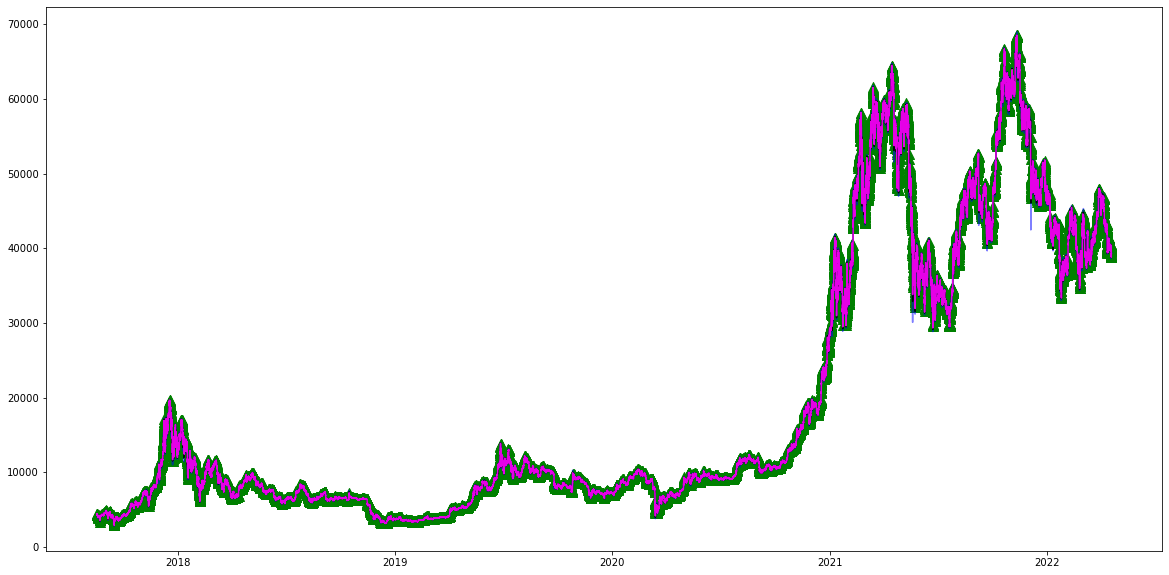

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df['close'], label='Asset price', c='blue', alpha=0.5)
plt.plot(df['MA20'], label='MA20', c='k', alpha=0.9)
plt.plot(df['MA50'], label='MA50', c='magenta', alpha=0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['close'], marker='^', color='g', s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['close'], marker='^', color='g', s=100)
plt.show()
plt.show()